# Diabetes Prediction
- **Author**: Anurag Dhadse

# Pre Exploration Questions?
This notebook is inspired from [Serhat Yazıcıoğlu Notebook](https://www.kaggle.com/serhatyzc/diabetes-prediction-with-cart).
- **What is Diabetes?**
    
    Diabetes is a metabolic disease that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn't make enough insulin or can't effectively use the insulin it does make.
    
## Where is this data from?
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to dianostically predict whether or not a patient has diabetes, based on certain diagnostic measaurements included in the dataset. Several contraints were places on the selection of these instance from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## What are the features/columns in the datset and what do they mean?
|Column | Description| Categorised |
| --- | --- | --- |
|**Pregnancies**|Number of times a female candidate become pregnant|$\begin{aligned}
\text{normal: 0-4}\\
\text{overpregnancies: >4}
\end{aligned}$|
|**Glucose**|Plasma Glucose concentration a 2 hrs in an oral glucose tolerance test.|$\begin{aligned}
\text{low: <70}\\
\text{normal: 70-99}\\
\text{high: 99-126}\\
\text{very_high: >126}\\
\end{aligned}$|
|**Blood Pressure**|Diastolic Blood Pressure level (mm/Hg)|$\begin{aligned}
\text{normal: <80}\\
\text{risky: >80}
\end{aligned}$|
|**SkinThickness**|Triceps skin fold thickness(mm)|$\begin{aligned}
\text{normal: <30}\\
\text{highfat: >= 70}\\
\end{aligned}$|
|**Insulin**|2-hours  serum insulin (muU/ml)| - | 
|**BMI**|Body mass index (weight in Kg/$\text{(height in m)}^2$)|$\begin{aligned}
\text{underweight: <18.5}\\
\text{normal: 18.5-25}\\
\text{overweight: 25-30}\\
\text{obese: >30}
\end{aligned}$|
|**Diabetes Pedigree Function**|a function which scores likelihood of diabetes based on family history||
|**Age**| Age in years | |
|**Outcome**| Class variable (0 or 1) 268 of 768 are 1, the others are 0||
    

# What needs to be done?
Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

sbs.set_theme()

# %matplotlib qt
%matplotlib inline

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that some values are outright outliers; like the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI are just 0. Which doesn't seems a possible value.

In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

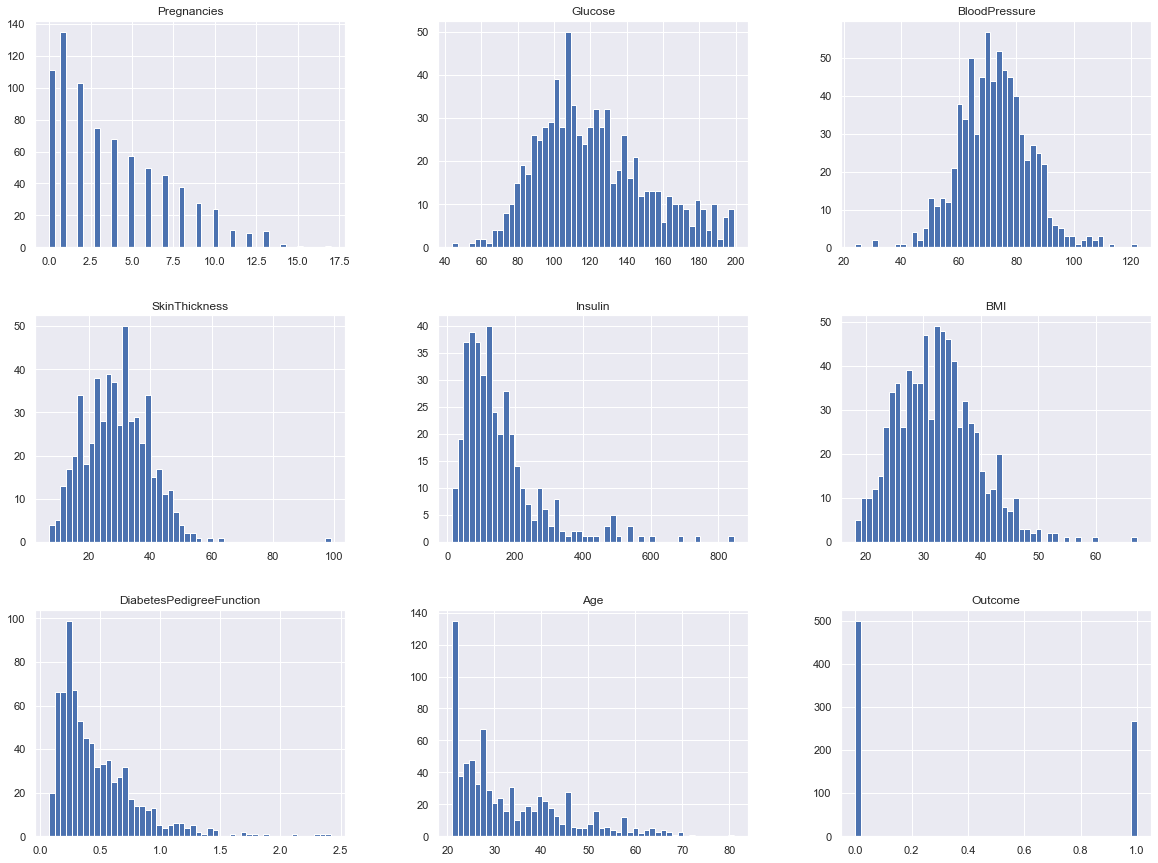

In [8]:
_ = df.hist(bins=50, figsize=(20, 15))

Let's see how many diabetic and healthy persons we do have.

<AxesSubplot:>

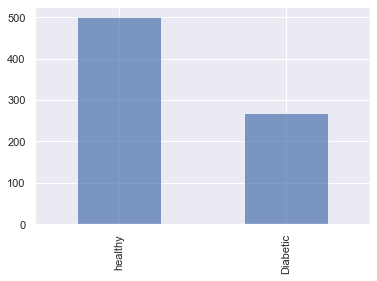

In [9]:
Healthy =  df[ df['Outcome'] == 0 ]
Diabetic = df[ df['Outcome'] == 1 ]

h_diab = pd.Series({'healthy':Healthy.shape[0],
            'Diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

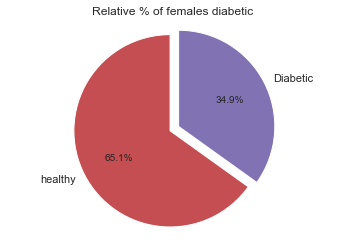

In [10]:
h_diab.plot.pie(startangle=90, 
                explode=[0, 0.1],
                autopct='%1.1f%%',
                colors=['C3', 'C4'])
plt.title('Relative % of females diabetic ')
plt.ylabel('')
_ = plt.axis('equal')

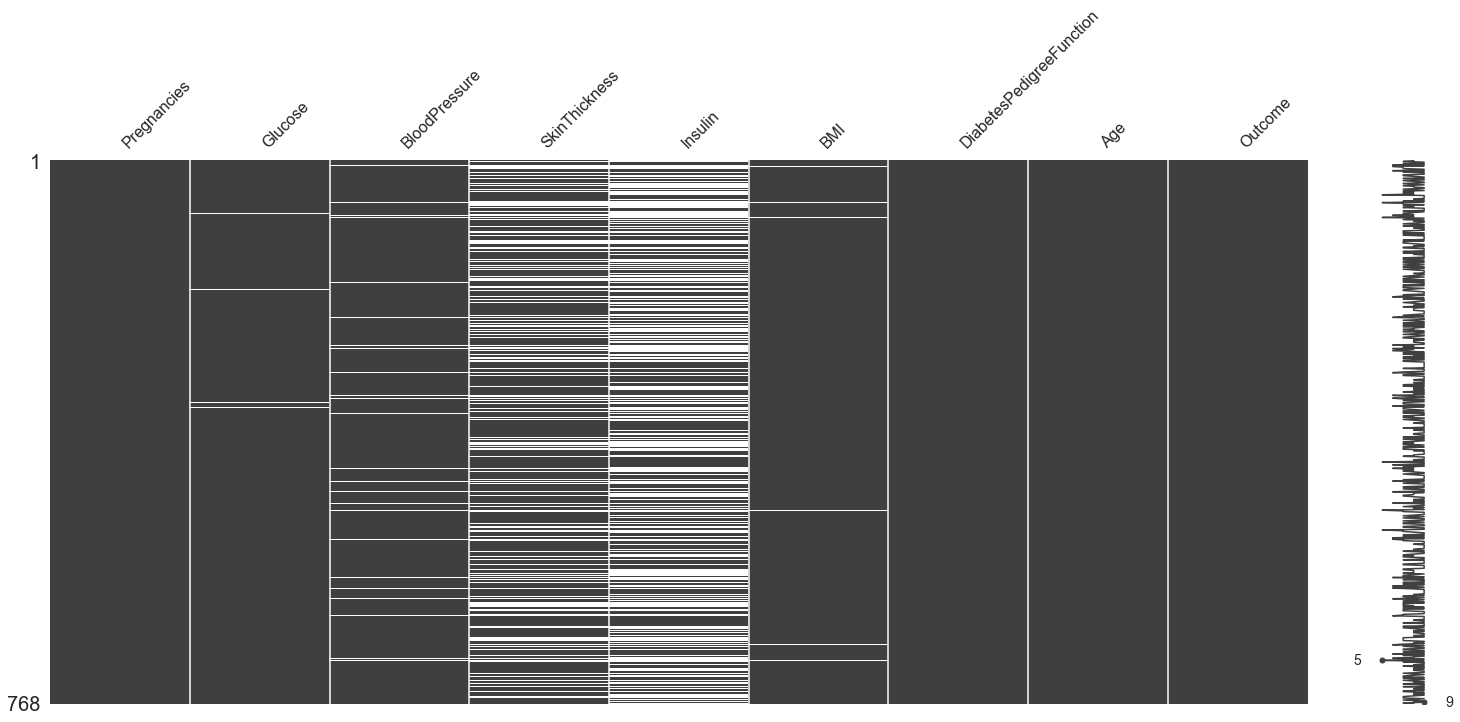

In [14]:
# Quickly find patterns of missingness in the dataset
msno.matrix(df);

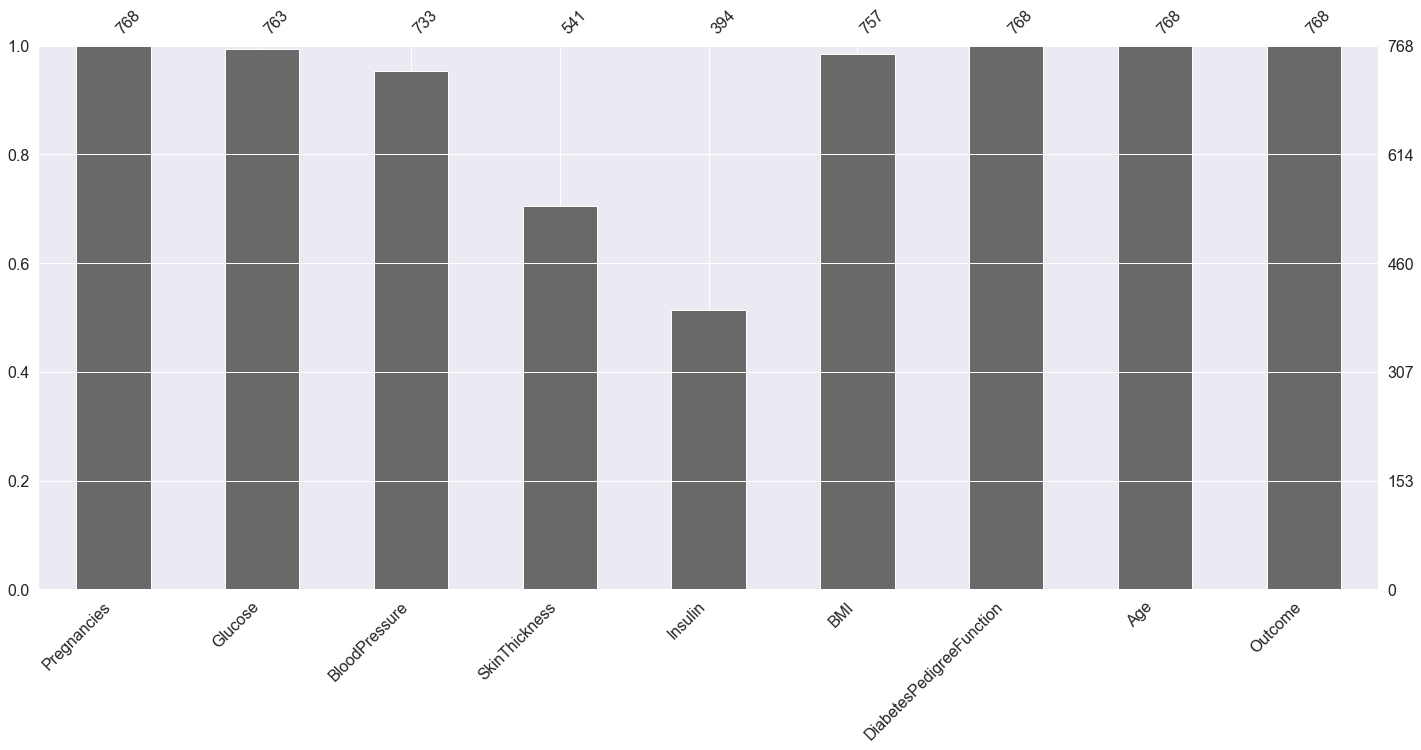

In [13]:
# Use bar to determine and get an idea of amount of missing values compared to other values
msno.bar(df);

**Heatmap shows the correlation of missingness between every 2 columns.**
- A value near **-1** means if one variable appears then the other variable is very likely to be **missing**.
- A values near **0** means there is **no dependence** between the occurance of missing values of two varaibles.
- A value near **1** means if one variable appears then the other variable is very likely to be **present**.

<AxesSubplot:>

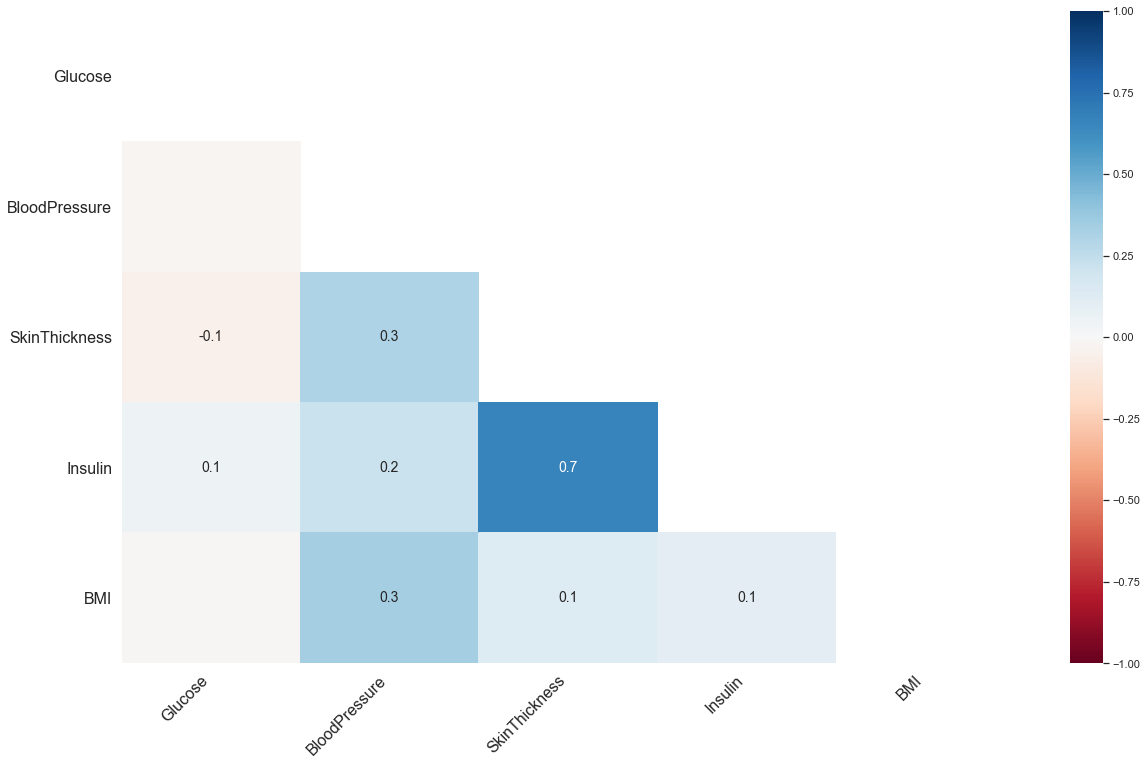

In [15]:
msno.heatmap(df)

### Taking a look at null values

In [58]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.pivot_table(index=['Outcome'] )

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.859674,70.877339,0.429734,110.643863,130.287879,3.298000,27.235457
1,37.067164,35.406767,75.321429,0.550500,142.319549,206.846154,4.865672,33.000000


We can replace this null values with median values with the appropriate values for the given outcome.

<mark>If the distribution is not symmetrical, it makes sense to use a median instead of the mean. B/c it represents the series better as it will be less affected by median outliers.</mark>


In [24]:
def replace_null_values(df):
    for col in df.columns:
        df.loc[(df['Outcome']==0) & (df[col].isnull()), col] = df[df['Outcome'] == 0][col].median()
        df.loc[(df['Outcome']==1) & (df[col].isnull()), col] = df[ df['Outcome'] == 1][col].median()
    print(df.isnull().sum())
    
replace_null_values(df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Outliers


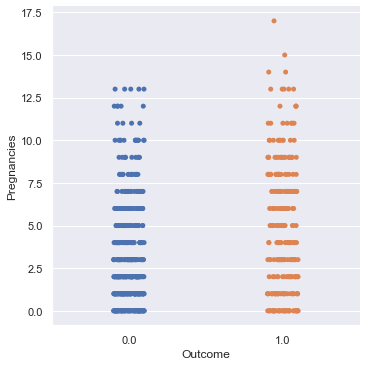

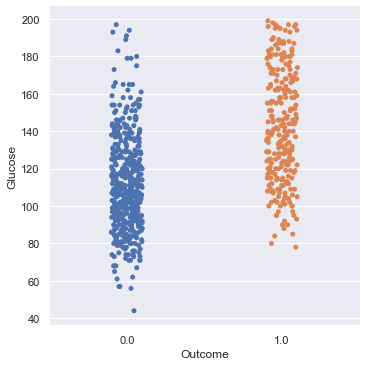

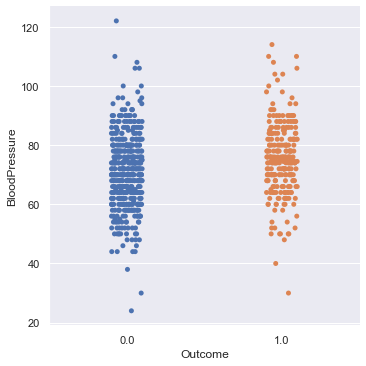

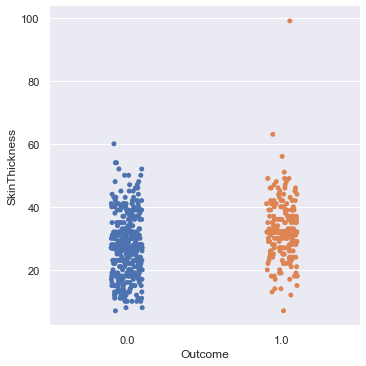

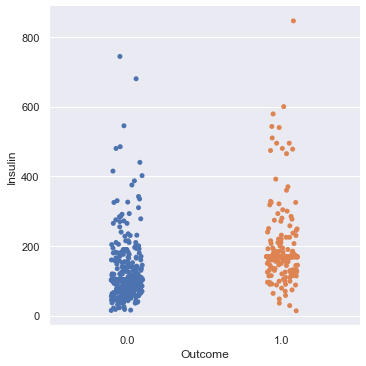

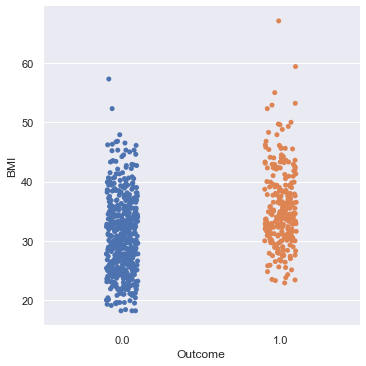

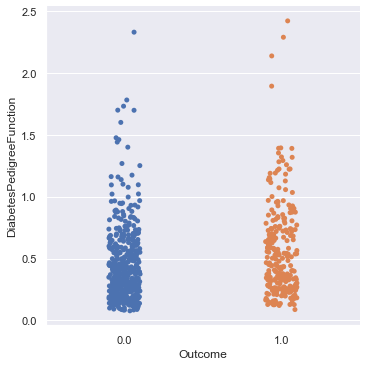

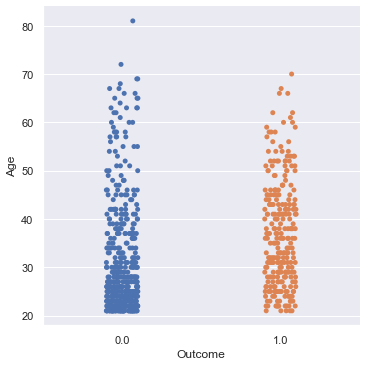

In [25]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(x="Outcome", y=col, data=df)

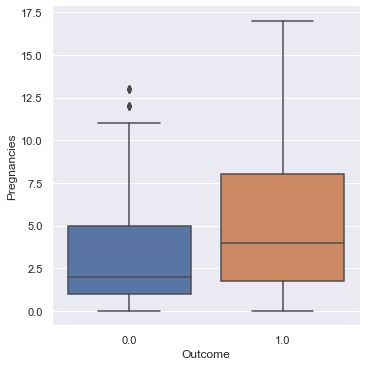

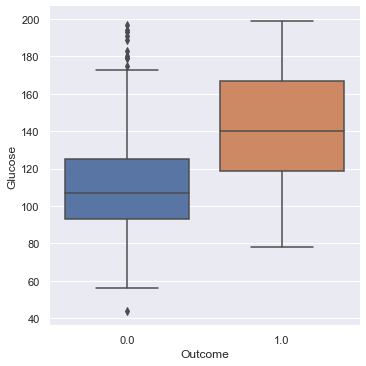

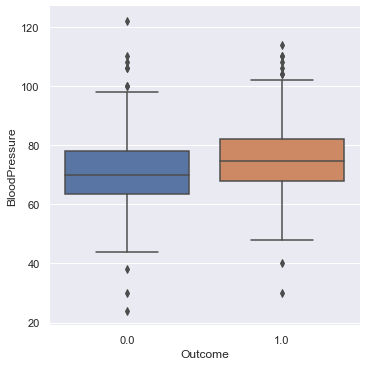

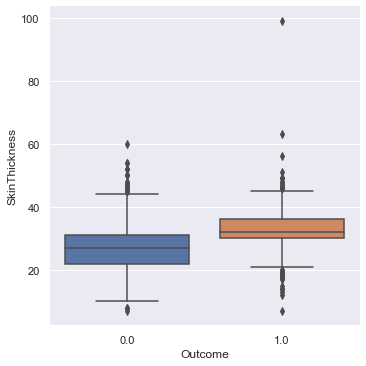

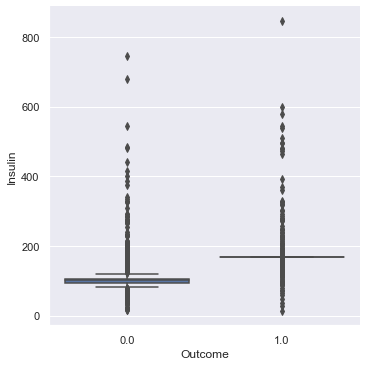

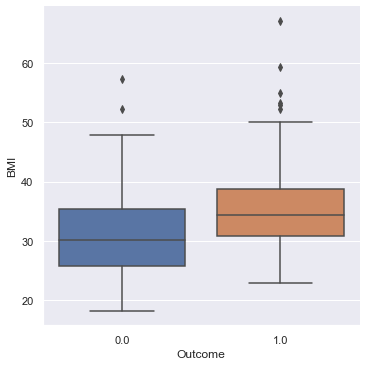

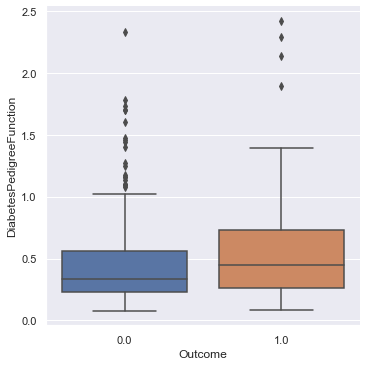

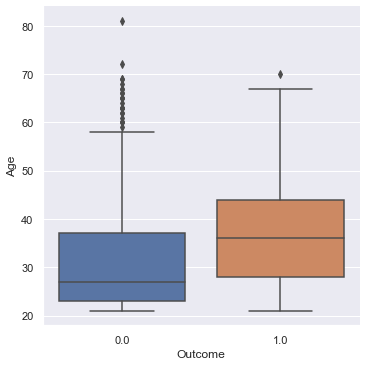

In [71]:
columns = []
for col in df.columns:
    if col != 'Outcome':
        sns.catplot(x='Outcome', y= col, kind='box', data=df)

### Feature Engineering

In [13]:
def create_new_bmi(df):
    new_cat = "NEW_BMI_CAT"
    df.loc[(df['BMI'] < 18.5), new_cat] = "underweight"
    df.loc[(df['BMI'] > 18.5) & (df['BMI'] < 25), new_cat] = "normal"
    df.loc[(df['BMI'] > 24) & (df['BMI'] < 30), new_cat] =  "overweight"
    df.loc[(df['BMI'] > 30) & (df['BMI']< 40), new_cat] = "obese"
    df.drop('BMI', axis=1, inplace=True)
    df[new_cat] = df[new_cat].astype('category')

def create_new_glucose(df): 
    new_cat = "NEW_GLUCOSE_CAT"
    df.loc[(df['Glucose'] < 70), new_cat] = "low"
    df.loc[(df['Glucose'] > 70) & (df['Glucose'] < 99), new_cat] = "normal"
    df.loc[(df['Glucose'] > 99) & (df['Glucose'] < 126), new_cat] = "high"
    df.loc[(df['Glucose'] > 126) & (df['Glucose'] < 200), new_cat] = "very_high"
    df[new_cat] = df[new_cat].astype('category')


def create_new_skinthickness(df):
    new_cat = "NEW_SKIN_THICKNESS"
    df.loc[df['SkinThickness'] < 30, new_cat] = "normal"
    df.loc[df['SkinThickness'] >= 70, new_cat] = "highfat"
    df[new_cat] = df[new_cat].astype('category')

def create_new_pregnancies(df):
    new_cat = "NEW_PREGNANCIES"
    df.loc[df['Pregnancies'] == 0, new_cat] = "no_pregnancies"
    df.loc[(df['Pregnancies'] > 0) & df['Pregnancies'] <= 4, new_cat] = "std_pregnancies"
    df.loc[(df['Pregnancies'] > 4), new_cat] = "over_pregnancies"
    df[new_cat] = df[new_cat].astype('category')

def create_circulation_level(df): 
    new_cat = "NEW_CIRCULATION_LEVEL"
    df.loc[(df['SkinThickness'] < 30) & (df['BloodPressure'] < 80), new_cat] = "normal"
    df.loc[(df['SkinThickness'] > 30) & (df['BloodPressure']>= 80), new_cat] = "high_risk"
    df.loc[((df['SkinThickness']< 30) & (df['BloodPressure'] >=80)) | ((df['SkinThickness']> 30) & (df['BloodPressure'] <80)), new_cat] = "medium_risk"
    df[new_cat] = df[new_cat].astype('category')
    df.drop('SkinThickness', axis=1, inplace=True)
    
def create_other_features(df):
    df['PRE_AGE_CAT'] = df['Age'] * df['Pregnancies']
    df['INSULIN_GLUCOSE_CAT'] = df['Insulin'] * df['Glucose']
    df.drop('Pregnancies', axis=1, inplace=True)
    df.drop('Glucose', axis=1, inplace=True)
    
create_new_bmi(df)
create_new_glucose(df)
create_new_pregnancies(df)
create_new_skinthickness(df)
create_circulation_level(df)
create_other_features(df)
df

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,NEW_BMI_CAT,NEW_GLUCOSE_CAT,NEW_PREGNANCIES,NEW_SKIN_THICKNESS,NEW_CIRCULATION_LEVEL,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT
0,72.0,169.5,0.627,50.0,1.0,obese,very_high,over_pregnancies,NaN,medium_risk,300.0,25086.0
1,66.0,102.5,0.351,31.0,0.0,overweight,normal,std_pregnancies,normal,normal,31.0,8712.5
2,64.0,169.5,0.672,32.0,1.0,normal,very_high,over_pregnancies,NaN,medium_risk,256.0,31018.5
3,66.0,94.0,0.167,21.0,0.0,overweight,normal,std_pregnancies,normal,normal,21.0,8366.0
4,40.0,168.0,2.288,33.0,1.0,NaN,very_high,std_pregnancies,NaN,medium_risk,0.0,23016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,76.0,180.0,0.171,63.0,0.0,obese,high,over_pregnancies,NaN,medium_risk,630.0,18180.0
764,70.0,102.5,0.340,27.0,0.0,obese,high,std_pregnancies,normal,normal,54.0,12505.0
765,72.0,112.0,0.245,30.0,0.0,overweight,high,over_pregnancies,normal,normal,150.0,13552.0
766,60.0,169.5,0.349,47.0,1.0,obese,NaN,std_pregnancies,NaN,medium_risk,47.0,21357.0


### Label Encoding
Doing Label encoding only for `Outcome` column.

In [14]:
df['NEW_CIRCULATION_LEVEL'].dtype.name == 'category'

True

In [15]:
len(df['NEW_CIRCULATION_LEVEL'].unique())

4

In [16]:
label_encoder = preprocessing.LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

### One-Hot Encoding
We'll do One-Hot encoding for categorical cols.

In [17]:
categ_cols = [col for col in df.columns if df[col].dtype.name == 'category']
print(categ_cols)

['NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_PREGNANCIES', 'NEW_SKIN_THICKNESS', 'NEW_CIRCULATION_LEVEL']


In [20]:
def one_hot_encoder(df, columns):
    df_dummy = df.copy()
    df_dummy = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_dummy

result = one_hot_encoder(df, categ_cols)
result

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT,NEW_BMI_CAT_obese,NEW_BMI_CAT_overweight,NEW_BMI_CAT_underweight,NEW_GLUCOSE_CAT_low,NEW_GLUCOSE_CAT_normal,NEW_GLUCOSE_CAT_very_high,NEW_PREGNANCIES_std_pregnancies,NEW_SKIN_THICKNESS_normal,NEW_CIRCULATION_LEVEL_medium_risk,NEW_CIRCULATION_LEVEL_normal
0,72.0,169.5,0.627,50.0,1,300.0,25086.0,1,0,0,0,0,1,0,0,1,0
1,66.0,102.5,0.351,31.0,0,31.0,8712.5,0,1,0,0,1,0,1,1,0,1
2,64.0,169.5,0.672,32.0,1,256.0,31018.5,0,0,0,0,0,1,0,0,1,0
3,66.0,94.0,0.167,21.0,0,21.0,8366.0,0,1,0,0,1,0,1,1,0,1
4,40.0,168.0,2.288,33.0,1,0.0,23016.0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76.0,180.0,0.171,63.0,0,630.0,18180.0,1,0,0,0,0,0,0,0,1,0
764,70.0,102.5,0.340,27.0,0,54.0,12505.0,1,0,0,0,0,0,1,1,0,1
765,72.0,112.0,0.245,30.0,0,150.0,13552.0,0,1,0,0,0,0,0,1,0,1
766,60.0,169.5,0.349,47.0,1,47.0,21357.0,1,0,0,0,0,0,1,0,1,0


# Model Training
First try with Logistic Regression.

In [21]:
from sklearn.model_selection import train_test_split

X = result.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

rmse  = lambda labels, predictions: np.sqrt(mean_squared_error(labels, predictions))

lg_model = LogisticRegression(max_iter=1000,C=0.01).fit(X_train, y_train)
lg_predictions = lg_model.predict(X_test)
rmse(y_test, lg_predictions)

0.4629100498862757

Since the consequences of detection False Negatives are high; the task should be **Recall centric**.

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score

print(accuracy_score(y_test, lg_predictions))
print(roc_auc_score(y_test, lg_predictions))

0.7857142857142857
0.7404040404040404


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lg_predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



### Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [400, 500, 600], 
              'max_leaf_nodes': [14, 15, 16]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

{'max_leaf_nodes': 15, 'n_estimators': 400}

In [117]:
print(classification_report(y_test, grid_search_rf.predict(X_test)))
print(recall_score(y_test, grid_search_rf.predict(X_test)))
print(roc_auc_score(y_test, grid_search_rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

0.8181818181818182
0.9298438934802571


This does seems to be reasonably acceptable Model. With roc_auc of 92% and recall of 81%. 